## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
y_train = train[:, 0]
# приводим размерность к удобному для обаботки виду
X_train = train[:, 1:].astype(np.float32)
X_test = test.astype(np.float32)

In [4]:
X_train.shape

(42000, 784)

## Визуализируем исходные данные

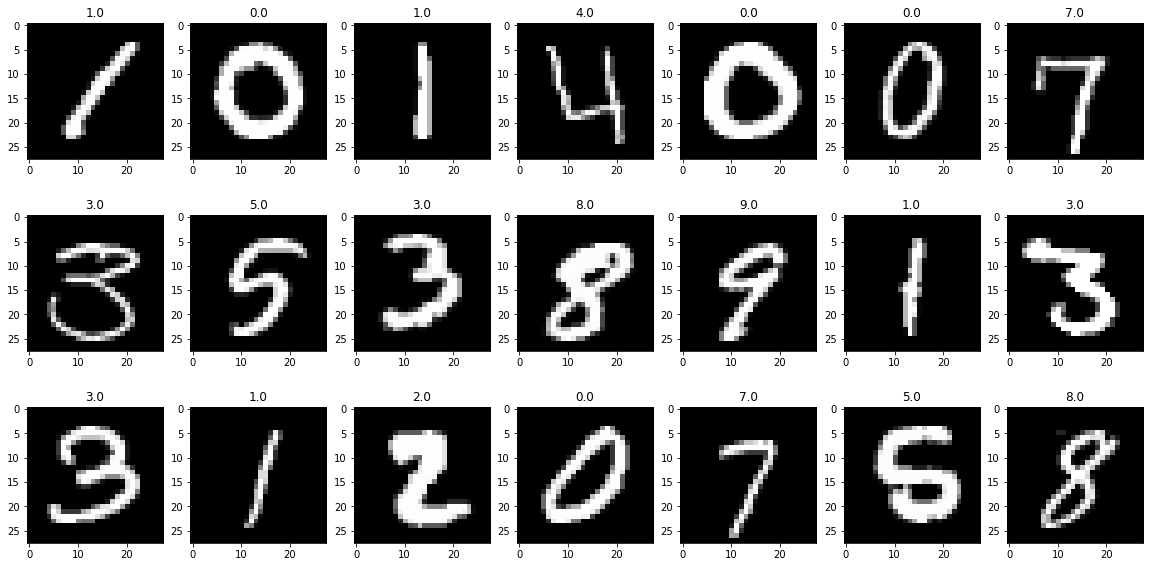

In [5]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X_train[0:21], 1):
    subplot = fig.add_subplot(3, 7, i)
    plt.imshow(img.reshape((28, 28)), cmap='gray');
    subplot.set_title('%s' % y_train[i - 1]);

## Снизим размерность применив метод PCA из sklearn

In [6]:
from sklearn.decomposition import PCA

In [7]:
RAND_STATE = 5948

In [8]:
def reduce(data, n_components):
    reducer = PCA(n_components).fit(data[0])
    return list(map(reducer.transform, data))

In [9]:
X_train_pca, X_test_pca = reduce([X_train, X_test], n_components=70)

In [10]:
X_test_pca.shape

(28000, 70)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=RAND_STATE)

tX_train, tX_test, ty_train, ty_test = train_test_split(X_train_pca, y_train, random_state=7022018, test_size=0.3)
model.fit(tX_train, ty_train)
ty_predict = model.predict(tX_test)
print('Accuracy: {:.5f}'.format(accuracy_score(ty_test, ty_predict)))
print('\nClassification report')
print(classification_report(ty_test, ty_predict))
print('\nConfusion matrix')
print(confusion_matrix(ty_test, ty_predict))

# cross_validate(model,X_train_pca, y_train)

Accuracy: 0.88849

Classification report
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92      1240
        1.0       0.96      0.98      0.97      1480
        2.0       0.85      0.90      0.87      1245
        3.0       0.84      0.86      0.85      1360
        4.0       0.85      0.90      0.88      1166
        5.0       0.87      0.80      0.83      1137
        6.0       0.93      0.92      0.92      1222
        7.0       0.93      0.90      0.91      1344
        8.0       0.89      0.80      0.84      1213
        9.0       0.87      0.83      0.85      1193

avg / total       0.89      0.89      0.89     12600


Confusion matrix
[[1199    0    7    6    2    7   10    2    5    2]
 [   0 1448   11    5    1    1    6    3    3    2]
 [  27    5 1117   28    8    9   14   14   18    5]
 [  19   15   51 1166    6   33    6   11   39   14]
 [  10    6    9    2 1053    1   11   11    9   54]
 [  36    5   18   86   15  912   26 

## Предсказания на тестовыйх данных

In [13]:
model = ExtraTreesClassifier(random_state=RAND_STATE)
model.fit(X_train_pca, y_train)
y_predict = model.predict(X_test_pca)

## Готовим файл для отправки

In [14]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_predict, 1):
        dst.write('%s,%.0f\n' % (i, p))

In [15]:
# Your submission scored 0.89742